#### IMPORTING LIBRARIES

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### DATA PRE-PROCESSING

In [2]:
# Reading the train and test dataset

df_train = pd.read_csv("D:\\AI & DS\\L5 Year 2\\CM2603 Data Science Group Project\\Datasets\\fraudTrain.csv\\fraudTrain.csv")
df_test = pd.read_csv("D:\\AI & DS\\L5 Year 2\\CM2603 Data Science Group Project\\Datasets\\fraudTest.csv\\fraudTest.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
# Examining the Train dataset imported:
df_train.shape

(1296675, 23)

In [4]:
# Examining the Test dataset imported:
df_test.shape

(555719, 23)

In [5]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [7]:
# Basic understanding of dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
# Basic understanding of dataframe 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

#### EXPLORATORY DATA ANALYSIS AND DATA PREPARATIONS

In [9]:
# Dropping of Unnamed column
df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
# Print the dataframe of train / test after drop the coloumns
print(df_train.shape)
print(df_test.shape)

(1296675, 22)
(555719, 22)


In [11]:
# Converting date columns to datetime format in train dataset
df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['trans_date']=pd.to_datetime(df_train['trans_date'])
df_train['dob']=pd.to_datetime(df_train['dob'])

df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [12]:
# Convert date column to datetime format in test dataset
df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['trans_date']=pd.to_datetime(df_test['trans_date'])
df_test['dob']=pd.to_datetime(df_test['dob'])

df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21


In [13]:
# Dropping fields not necessary for model building
drop_cols = ['cc_num','merchant','first','last','street','zip','trans_num','unix_time']
df_traindata = df_train.drop(drop_cols,axis=1)
df_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [14]:
drop_cols = ['cc_num','merchant','first','last','street','zip','trans_num','unix_time']
df_testdata = df_test.drop(drop_cols,axis=1)
df_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [15]:
df_traindata.describe()

,trans_date_trans_time,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_date
count,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1296675
mean,2019-10-03 12:47:28.070214144,7.035104e+01,3.853762e+01,-9.022634e+01,8.882444e+04,1973-10-03 19:02:55.017178512,3.853734e+01,-9.022646e+01,5.788652e-03,2019-10-02 23:29:11.362831872
min,2019-01-01 00:00:18,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.902779e+01,-1.666712e+02,0.000000e+00,2019-01-01 00:00:00
25%,2019-06-03 19:12:22.500000,9.650000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,1962-08-13 00:00:00,3.473357e+01,-9.689728e+01,0.000000e+00,2019-06-03 00:00:00
50%,2019-10-03 07:35:47,4.752000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,1975-11-30 00:00:00,3.936568e+01,-8.743839e+01,0.000000e+00,2019-10-03 00:00:00
75%,2020-01-28 15:02:55.500000,8.314000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,1987-02-22 00:00:00,4.195716e+01,-8.023680e+01,0.000000e+00,2020-01-28 00:00:00
max,2020-06-21 12:13:37,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,6.751027e+01,-6.695090e+01,1.000000e+00,2020-06-21 00:00:00
std,NaN,1.603160e+02,5.075808e+00,1.375908e+01,3.019564e+05,NaN,5.109788e+00,1.377109e+01,7.586269e-02,NaN


In [16]:
df_testdata.describe()

,trans_date_trans_time,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_date
count,555719,555719.000000,555719.000000,555719.000000,5.557190e+05,555719,555719.000000,555719.000000,555719.000000,555719
mean,2020-10-02 01:54:25.166780672,69.392810,38.543253,-90.231325,8.822189e+04,1973-11-11 16:30:05.937173264,38.542798,-90.231380,0.003860,2020-10-01 12:35:52.929807872
min,2020-06-21 12:14:25,1.000000,20.027100,-165.672300,2.300000e+01,1924-10-30 00:00:00,19.027422,-166.671575,0.000000,2020-06-21 00:00:00
25%,2020-08-09 06:10:27.500000,9.630000,34.668900,-96.798000,7.410000e+02,1962-09-27 00:00:00,34.755302,-96.905129,0.000000,2020-08-09 00:00:00
50%,2020-10-03 00:59:48,47.290000,39.371600,-87.476900,2.408000e+03,1975-11-30 00:00:00,39.376593,-87.445204,0.000000,2020-10-03 00:00:00
75%,2020-12-01 03:03:04,83.010000,41.894800,-80.175200,1.968500e+04,1987-04-23 00:00:00,41.954163,-80.264637,0.000000,2020-12-01 00:00:00
max,2020-12-31 23:59:34,22768.110000,65.689900,-67.950300,2.906700e+06,2005-01-29 00:00:00,66.679297,-66.952026,1.000000,2020-12-31 00:00:00
std,NaN,156.745941,5.061336,13.721780,3.003909e+05,NaN,5.095829,13.733071,0.062008,NaN


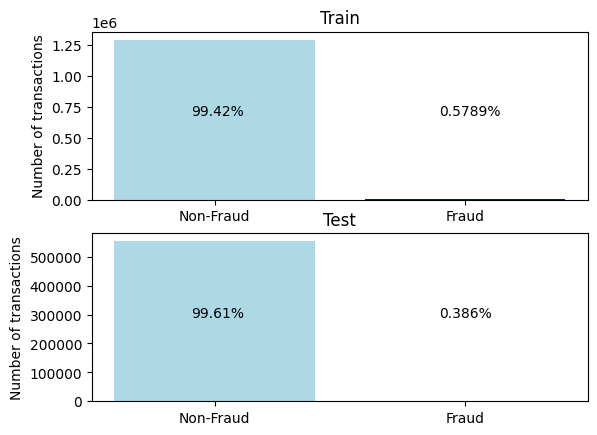

In [20]:
# Checking Class Imbalance
classes_train=df_traindata['is_fraud'].value_counts()
normal_share_train=classes_train[0]/df_traindata['is_fraud'].count()*100
fraud_share_train=classes_train[1]/df_traindata['is_fraud'].count()*100

classes_test=df_testdata['is_fraud'].value_counts()
normal_share_test=classes_test[0]/df_testdata['is_fraud'].count()*100
fraud_share_test=classes_test[1]/df_testdata['is_fraud'].count()*100

plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['lightblue','blue'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], classes_test, color=['lightblue','blue'])
plt.title('Test')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_test),(0.7, 0.5), xycoords='axes fraction')

plt.show()

In [22]:
# Finding the initial full correlation in the dataset:
numeric_cols = df_traindata.select_dtypes(include=[np.number])
cor = numeric_cols.corr()
print(cor)

                 amt       lat      long  city_pop  merch_lat  merch_long  \
amt         1.000000 -0.001926 -0.000187  0.005818  -0.001873   -0.000151   
lat        -0.001926  1.000000 -0.015533 -0.155730   0.993592   -0.015509   
long       -0.000187 -0.015533  1.000000 -0.052715  -0.015452    0.999120   
city_pop    0.005818 -0.155730 -0.052715  1.000000  -0.154781   -0.052687   
merch_lat  -0.001873  0.993592 -0.015452 -0.154781   1.000000   -0.015431   
merch_long -0.000151 -0.015509  0.999120 -0.052687  -0.015431    1.000000   
is_fraud    0.219404  0.001894  0.001721  0.002136   0.001741    0.001721   

            is_fraud  
amt         0.219404  
lat         0.001894  
long        0.001721  
city_pop    0.002136  
merch_lat   0.001741  
merch_long  0.001721  
is_fraud    1.000000  


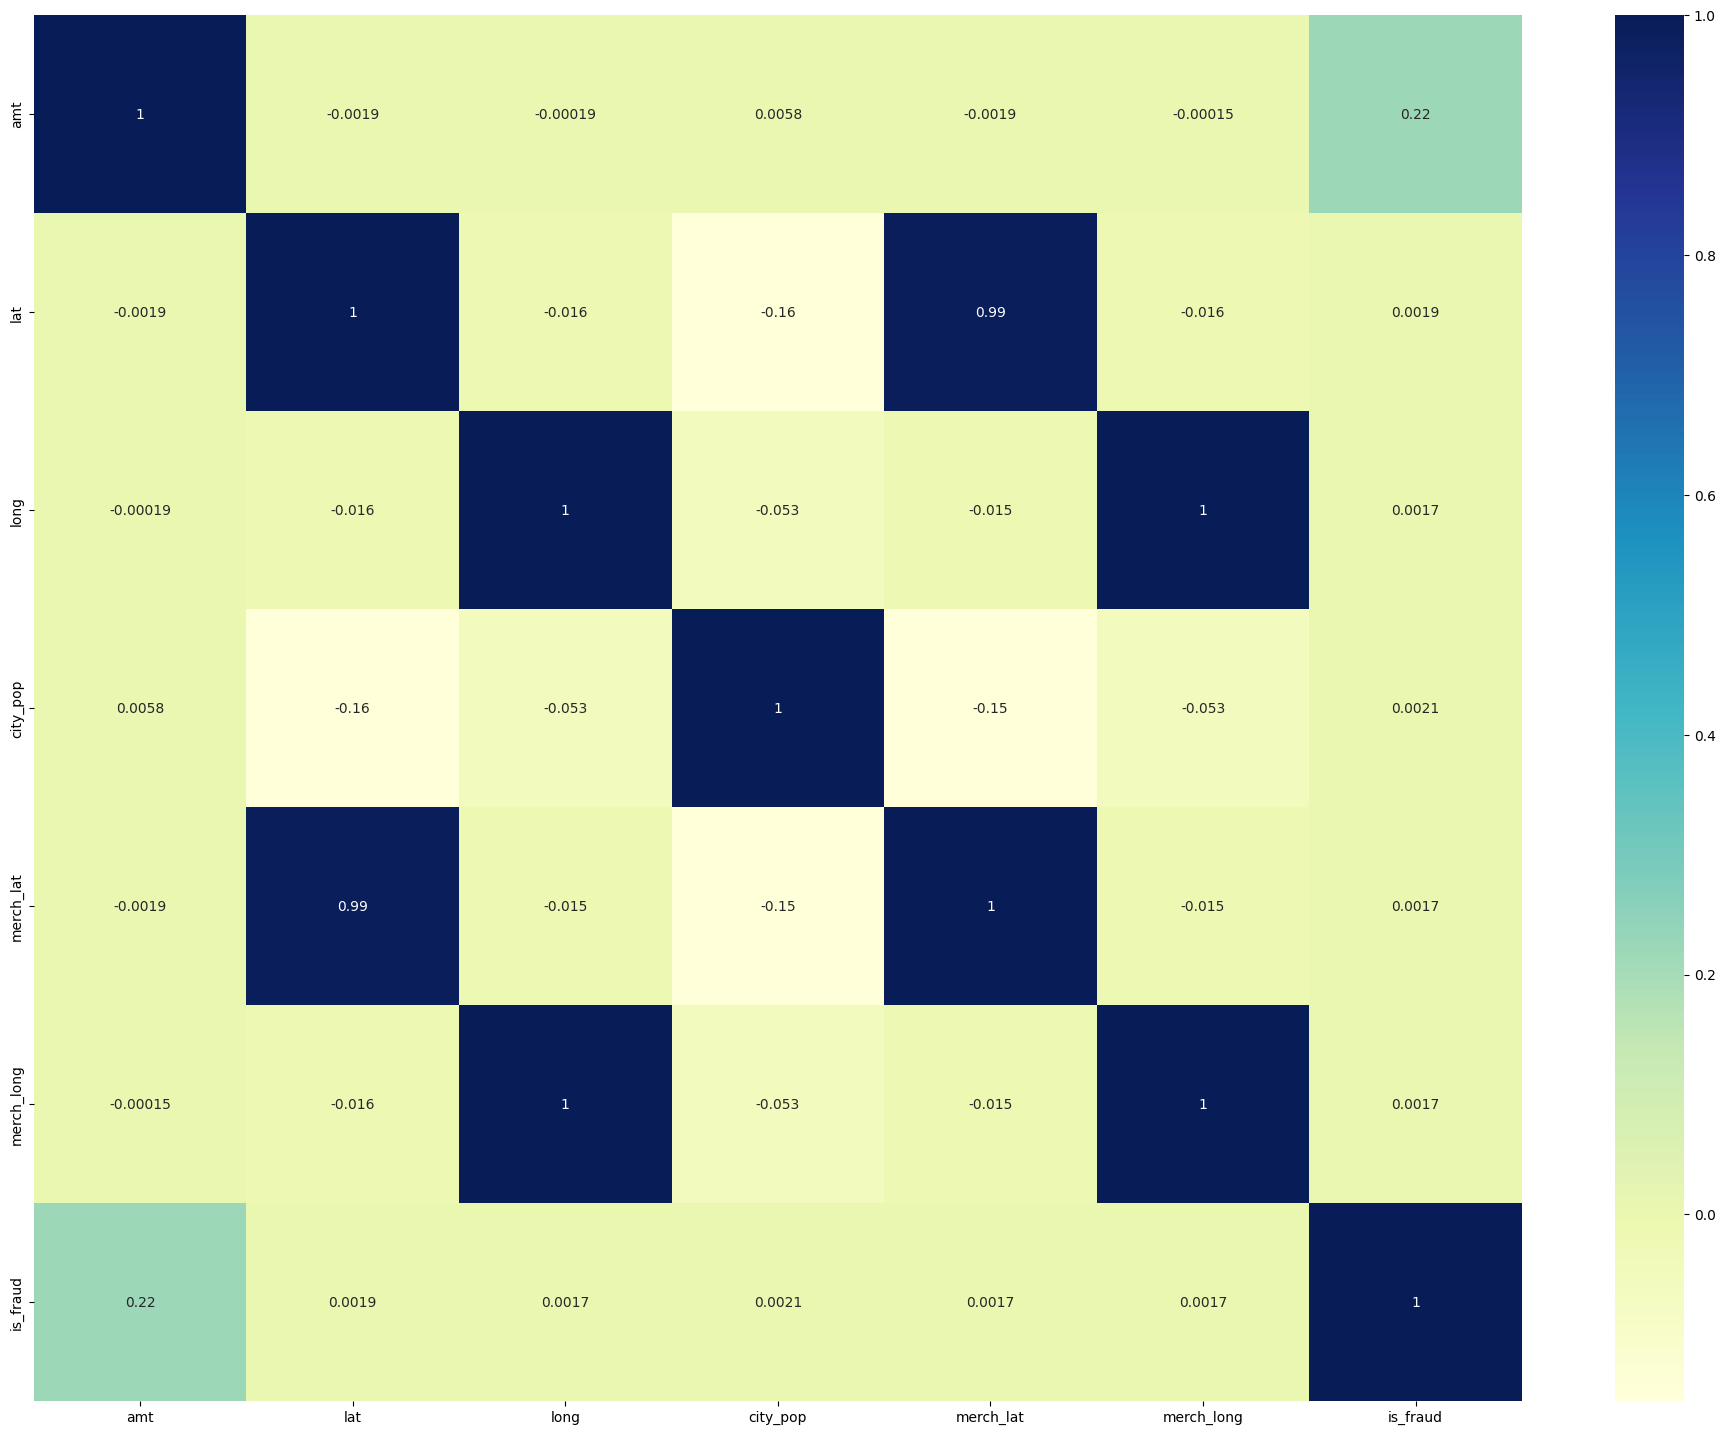

In [23]:
# Plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [27]:
# Calculate age in years by dividing the days by 365.25 (accounting for leap years)
df_traindata['age_at_trans'] = (df_traindata['trans_date'] - df_traindata['dob']) / np.timedelta64(1, 'D') / 365.25
df_traindata['age_at_trans'] = df_traindata['age_at_trans'].apply(np.floor)  # Floor the age to get completed years

# Repeat the same for test data
df_testdata['age_at_trans'] = (df_testdata['trans_date'] - df_testdata['dob']) / np.timedelta64(1, 'D') / 365.25
df_testdata['age_at_trans'] = df_testdata['age_at_trans'].apply(np.floor)

# Now you can view the modified dataframe
df_traindata.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age_at_trans
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0


In [28]:
# show the test data head
df_testdata.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age_at_trans
0,2020-06-21 12:14:25,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,2020-06-21,52.0
1,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,2020-06-21,30.0
2,2020-06-21 12:14:53,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,2020-06-21,49.0
3,2020-06-21 12:15:15,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,2020-06-21,32.0
4,2020-06-21 12:15:17,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,2020-06-21,64.0


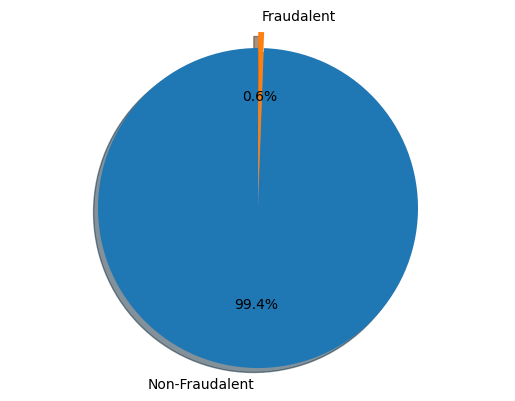

In [29]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df_traindata['is_fraud'].value_counts()
normal_share=classes[0]/df_traindata['is_fraud'].count()*100
fraud_share=classes[1]/df_traindata['is_fraud'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [30]:
print('The percentage without Non-Fradulent prediction is ', round(df_traindata['is_fraud'].value_counts()[0]/len(df_traindata) * 100,2), '% of the dataset')
print('The percentage with Fradulent prediction is ', round(df_traindata['is_fraud'].value_counts()[1]/len(df_traindata) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df_traindata['is_fraud'].value_counts()[1]/df_traindata['is_fraud'].value_counts()[0] * 100,2))

The percentage without Non-Fradulent prediction is  99.42 % of the dataset
The percentage with Fradulent prediction is  0.58 % of the dataset
The ratio of imbalance is 0.58


In [31]:
# Portray the train dataset and analyse
df_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [32]:
# Portray the test dataset and analyse
df_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [33]:
# To identify the fraud transaction fraud_city 
fraud_city = pd.DataFrame(df_traindata.groupby('city')['is_fraud'].sum())
fraud_city = fraud_city[fraud_city['is_fraud']>0]
fraud_city.index

Index(['Achille', 'Acworth', 'Afton', 'Albany', 'Albuquerque', 'Alder',
       'Aledo', 'Alexandria', 'Allenhurst', 'Allentown',
       ...
       'Wilmington', 'Winfield', 'Winger', 'Winnsboro', 'Winslow', 'Winter',
       'Winthrop', 'Wittenberg', 'Yellowstone National Park', 'Zaleski'],
      dtype='object', name='city', length=702)

In [34]:
# Groupby States in the city persists in fradulent transaction
fraud_state = pd.DataFrame(df_traindata.groupby('state')['is_fraud'].sum())
fraud_state = fraud_state[fraud_state['is_fraud']>0]
fraud_state.index
     

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [35]:
# Groupby Fraudesters related jobs
fraud_job = pd.DataFrame(df_traindata.groupby('job')['is_fraud'].sum())
fraud_job = fraud_job[fraud_job['is_fraud']>0]
fraud_job.index

Index(['Academic librarian', 'Accountant, chartered',
       'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrator', 'Administrator, arts',
       'Administrator, charities/voluntary organisations',
       'Administrator, education',
       ...
       'Veterinary surgeon', 'Video editor', 'Volunteer coordinator',
       'Warden/ranger', 'Warehouse manager', 'Waste management officer',
       'Water quality scientist', 'Web designer', 'Wellsite geologist',
       'Writer'],
      dtype='object', name='job', length=443)

In [36]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude

df_traindata['lat_dist'] = abs(round(df_traindata['merch_lat']-df_traindata['lat'],3))
df_traindata['long_dist'] = abs(round(df_traindata['merch_long']-df_traindata['long'],3))

df_testdata['lat_dist'] = abs(round(df_testdata['merch_lat']-df_testdata['lat'],3))
df_testdata['long_dist'] = abs(round(df_testdata['merch_long']-df_testdata['long'],3))

df_traindata[['merch_lat','lat','lat_dist','merch_long','long','long_dist']].head()

,merch_lat,lat,lat_dist,merch_long,long,long_dist
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


In [37]:
df_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [38]:
df_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [49]:
# Impute month column
df_traindata['trans_month'] = pd.DatetimeIndex(df_traindata['trans_date']).month
df_testdata['trans_month'] = pd.DatetimeIndex(df_testdata['trans_date']).month

In [50]:
print(df_traindata[['trans_date_trans_time','trans_month']].head())
print(df_testdata[['trans_date_trans_time','trans_month']].head())

  trans_date_trans_time  trans_month
0   2019-01-01 00:00:18            1
1   2019-01-01 00:00:44            1
2   2019-01-01 00:00:51            1
3   2019-01-01 00:01:16            1
4   2019-01-01 00:03:06            1
  trans_date_trans_time  trans_month
0   2020-06-21 12:14:25            6
1   2020-06-21 12:14:33            6
2   2020-06-21 12:14:53            6
3   2020-06-21 12:15:15            6
4   2020-06-21 12:15:17            6


In [51]:
# Impute transaction time column
df_traindata['trans_time'] = pd.DatetimeIndex(df_traindata['trans_date_trans_time']).time
df_testdata['trans_time'] = pd.DatetimeIndex(df_testdata['trans_date_trans_time']).time

In [52]:
print(df_traindata[['trans_date_trans_time','trans_time']].head())
print(df_testdata[['trans_date_trans_time','trans_time']].head())

  trans_date_trans_time trans_time
0   2019-01-01 00:00:18   00:00:18
1   2019-01-01 00:00:44   00:00:44
2   2019-01-01 00:00:51   00:00:51
3   2019-01-01 00:01:16   00:01:16
4   2019-01-01 00:03:06   00:03:06
  trans_date_trans_time trans_time
0   2020-06-21 12:14:25   12:14:25
1   2020-06-21 12:14:33   12:14:33
2   2020-06-21 12:14:53   12:14:53
3   2020-06-21 12:15:15   12:15:15
4   2020-06-21 12:15:17   12:15:17


In [53]:
#To check the nunique variable in dataframe in train dataset
df_traindata.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
age_at_trans                  83
lat_dist                    1001
long_dist                   1001
trans_time                 86400
trans_month                   12
dtype: int64

In [54]:
#To check the nunique variable in dataframe in test dataset
df_testdata.nunique()

trans_date_trans_time    544760
category                     14
amt                       37256
gender                        2
city                        849
state                        50
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
merch_lat                546490
merch_long               551770
is_fraud                      2
trans_date                  194
age_at_trans                 82
lat_dist                   1001
long_dist                  1001
trans_time                86092
trans_month                   7
dtype: int64

In [55]:
df_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [56]:
#To round off the catergory in train data 
round(df_traindata['category'].value_counts()/len(df_traindata.index)*100,2)

category
gas_transport     10.15
grocery_pos        9.54
home               9.49
shopping_pos       9.00
kids_pets          8.72
shopping_net       7.52
entertainment      7.25
food_dining        7.05
personal_care      7.00
health_fitness     6.62
misc_pos           6.14
misc_net           4.88
grocery_net        3.51
travel             3.12
Name: count, dtype: float64

In [57]:
#To round off the gender in train data 
round(df_traindata['gender'].value_counts()/len(df_traindata.index)*100,2)

gender
F    54.74
M    45.26
Name: count, dtype: float64

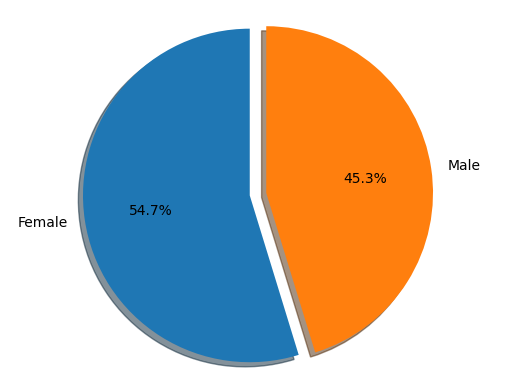

In [58]:
classes_gender=round(df_traindata['gender'].value_counts()/len(df_traindata.index)*100,2)

labels = 'Female', 'Male'
sizes = classes_gender
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [59]:
# To round off the value based on the city
round(df_traindata['city'].value_counts()/len(df_traindata.index)*100,2)

city
Birmingham     0.43
San Antonio    0.40
Utica          0.39
Phoenix        0.39
Meridian       0.39
               ... 
Vacaville      0.00
Claypool       0.00
Karns City     0.00
Bruce          0.00
Chattanooga    0.00
Name: count, Length: 894, dtype: float64

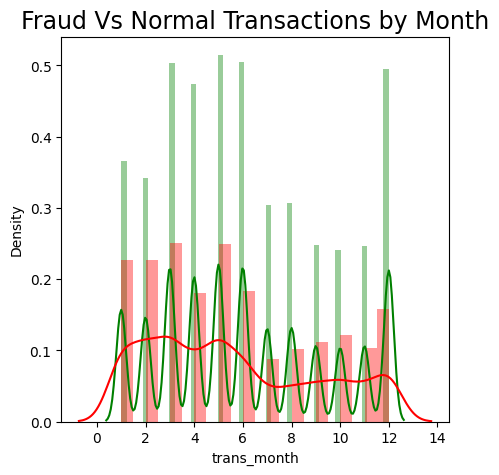

In [60]:
#The fraus Vs normal trasaction by Month
plt.figure(figsize=(5,5))
sns.distplot(df_traindata[df_traindata['is_fraud'] == 0]["trans_month"], color='green')
sns.distplot(df_traindata[df_traindata['is_fraud'] == 1]["trans_month"], color='red')
plt.title('Fraud Vs Normal Transactions by Month', fontsize=17)
plt.show()

In [61]:
# Drop the fields which is not impact to build the model 
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','trans_time']

df_traindata1 = df_traindata.drop(drop_cols,axis=1)
df_testdata1 = df_testdata.drop(drop_cols,axis=1)

In [62]:
df_traindata1.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,F,NC,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,F,WA,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,M,ID,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,M,MT,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,M,VA,99,0,32.0,0.254,0.830,1


In [63]:
# Find Percentile 
df_traindata1[['amt','city_pop','age_at_trans','lat_dist','long_dist']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age_at_trans,lat_dist,long_dist
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,4.549541e+01,5.002626e-01,5.003366e-01
std,1.603160e+02,3.019564e+05,1.739698e+01,2.885700e-01,2.888704e-01
min,1.000000e+00,2.300000e+01,1.300000e+01,0.000000e+00,0.000000e+00
25%,9.650000e+00,7.430000e+02,3.200000e+01,2.500000e-01,2.500000e-01
50%,4.752000e+01,2.456000e+03,4.300000e+01,5.010000e-01,5.000000e-01
75%,8.314000e+01,2.032800e+04,5.700000e+01,7.500000e-01,7.510000e-01
90%,1.366700e+02,1.861400e+05,7.000000e+01,9.000000e-01,9.000000e-01
95%,1.963100e+02,5.257130e+05,7.900000e+01,9.500000e-01,9.500000e-01
99%,5.459926e+02,1.577385e+06,9.100000e+01,9.900000e-01,9.900000e-01


In [64]:
# Impute the dummy variables
df_traindata2 = pd.get_dummies(df_traindata1,columns=['category'],drop_first=True)
df_testdata2 = pd.get_dummies(df_testdata1,columns=['category'],drop_first=True)

In [65]:
# Check the dataframe after impute dummy variables
df_traindata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  object 
 2   state                    1296675 non-null  object 
 3   city_pop                 1296675 non-null  int64  
 4   is_fraud                 1296675 non-null  int64  
 5   age_at_trans             1296675 non-null  float64
 6   lat_dist                 1296675 non-null  float64
 7   long_dist                1296675 non-null  float64
 8   trans_month              1296675 non-null  int32  
 9   category_food_dining     1296675 non-null  bool   
 10  category_gas_transport   1296675 non-null  bool   
 11  category_grocery_net     1296675 non-null  bool   
 12  category_grocery_pos     1296675 non-null  bool   
 13  category_health_fitness  1296675 non-null 

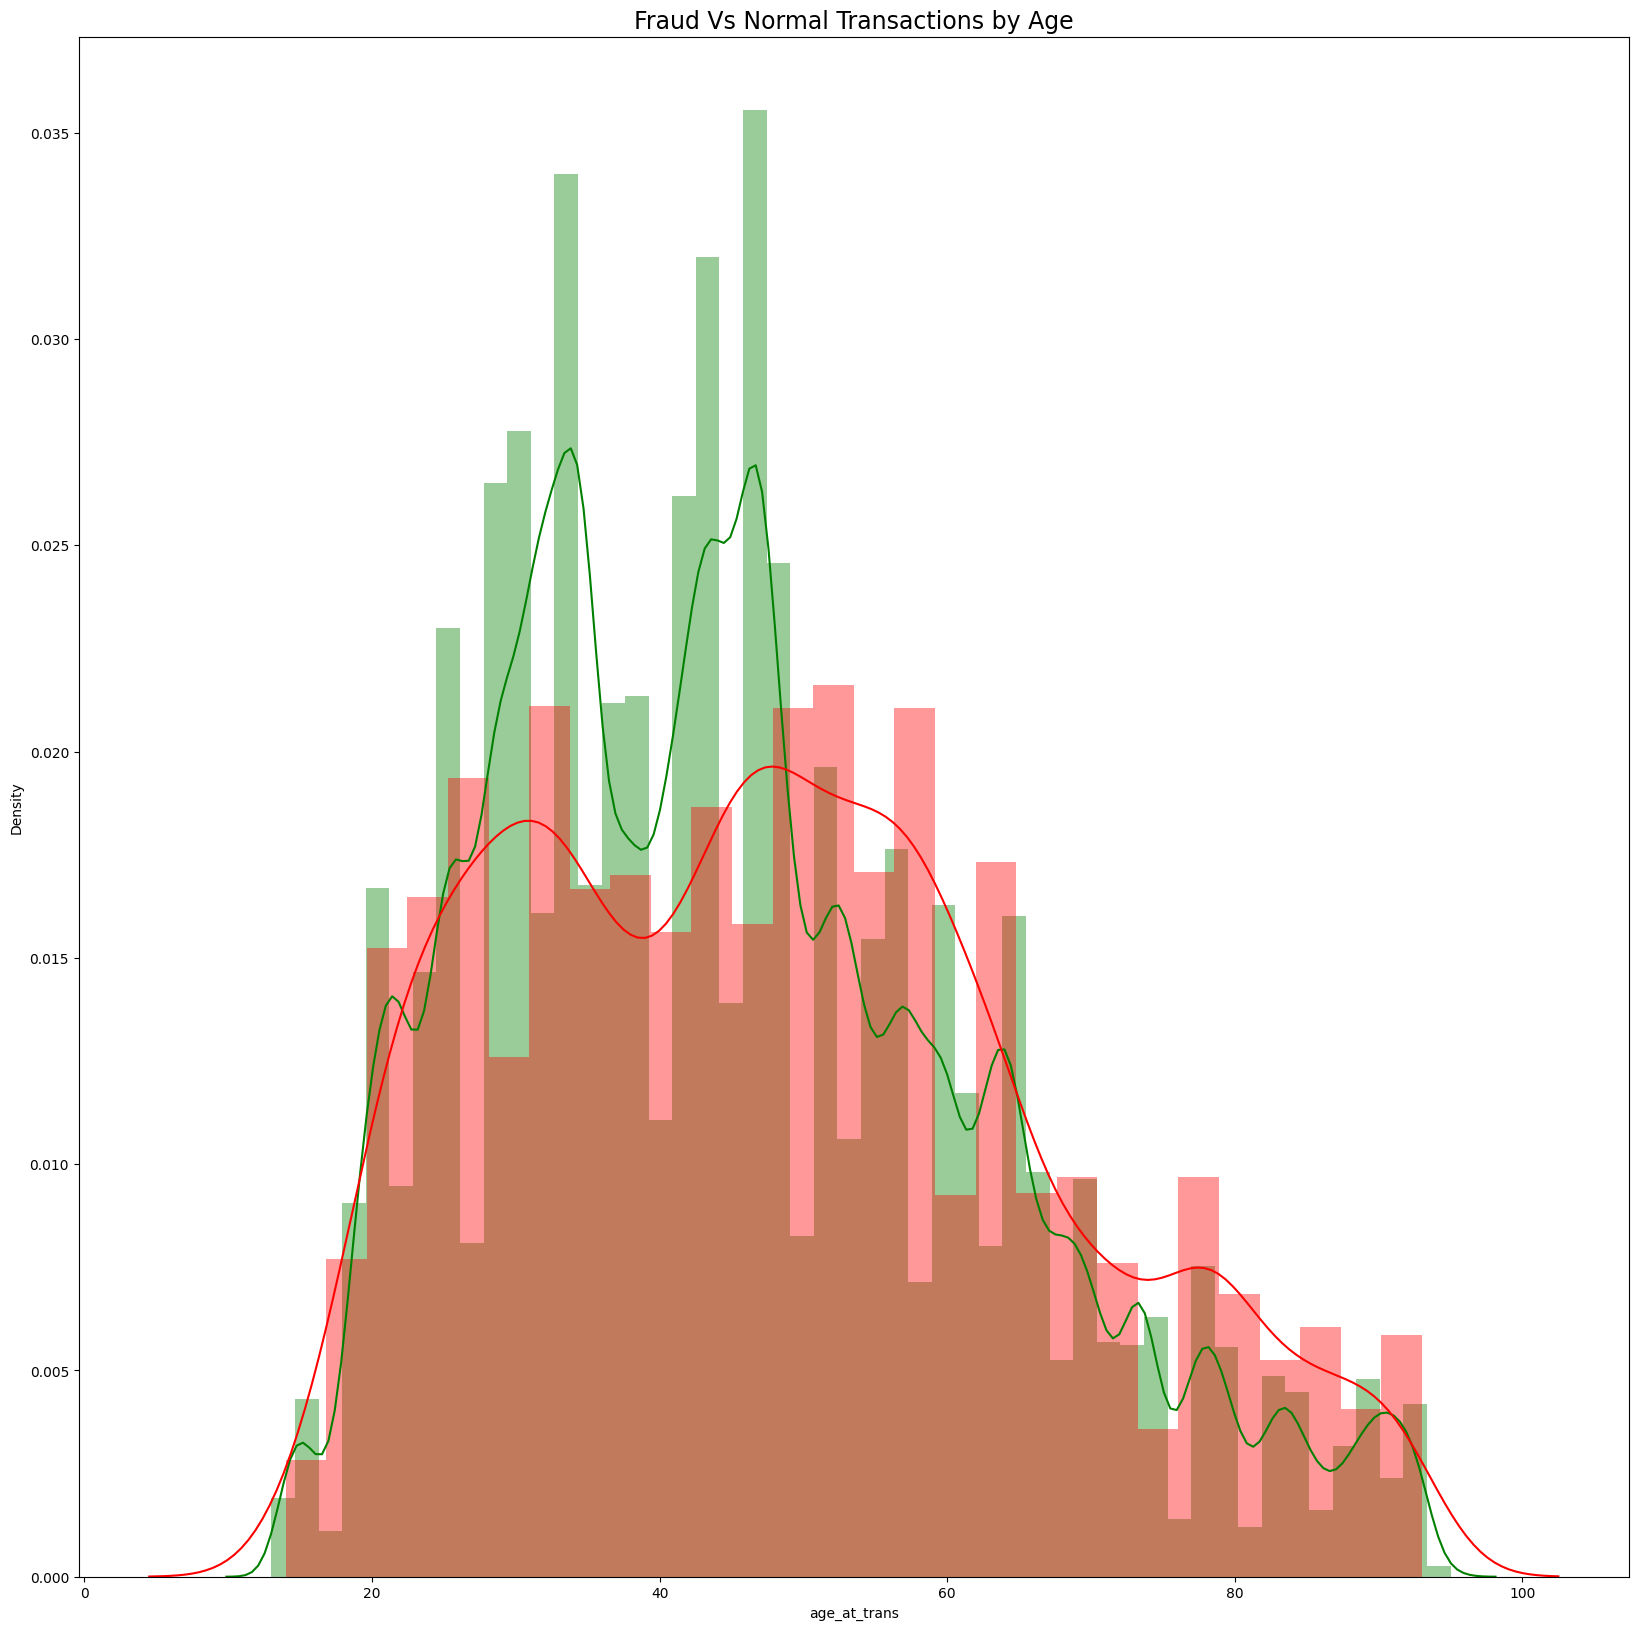

In [66]:
# The fraus Vs normal trasaction by day
plt.figure(figsize=(20,20))
sns.distplot(df_traindata2[df_traindata2['is_fraud'] == 0]["age_at_trans"], color='green')
sns.distplot(df_traindata2[df_traindata2['is_fraud'] == 1]["age_at_trans"], color='red')
plt.title('Fraud Vs Normal Transactions by Age', fontsize=17)
plt.show()

In [67]:
# To clearly the data of frauds and no frauds
df_traindata2_Fraud = df_traindata2[df_traindata2['is_fraud'] == 1]
df_traindata2_Regular = df_traindata2[df_traindata2['is_fraud'] == 0]

# Fraud Transaction Amount Statistics
print(df_traindata2_Fraud["amt"].describe())

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64


In [68]:
# Regular Transaction Amount Statistics
print(df_traindata2_Regular["amt"].describe())

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64


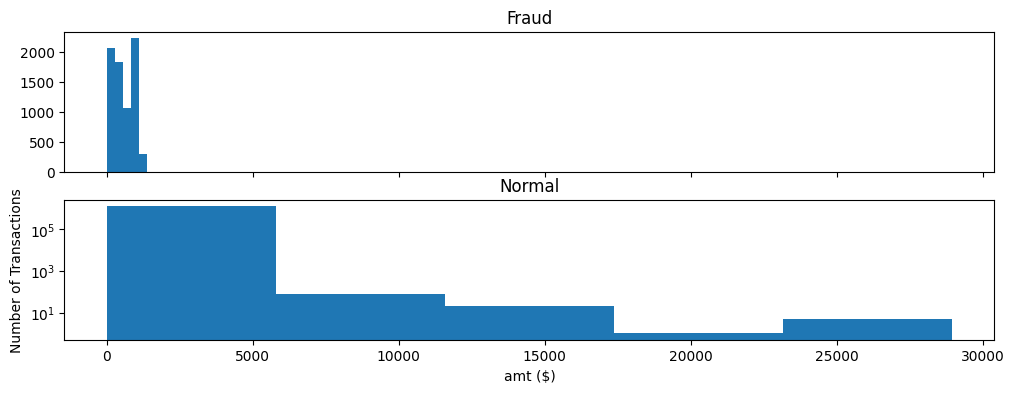

In [69]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 5

ax1.hist(df_traindata2_Fraud.amt[df_traindata2_Fraud.is_fraud == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_traindata2_Regular.amt[df_traindata2_Regular.is_fraud == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('amt ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

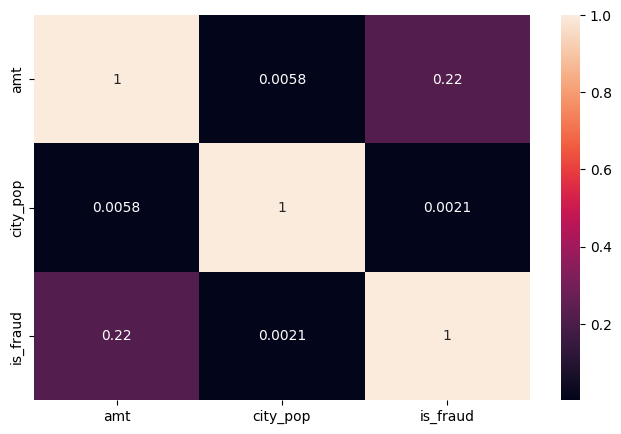

In [70]:
# Plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:
top_feature = cor.index[abs(cor['is_fraud']>0.002)]
plt.subplots(figsize=(8, 5))
top_corr = df_traindata2[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

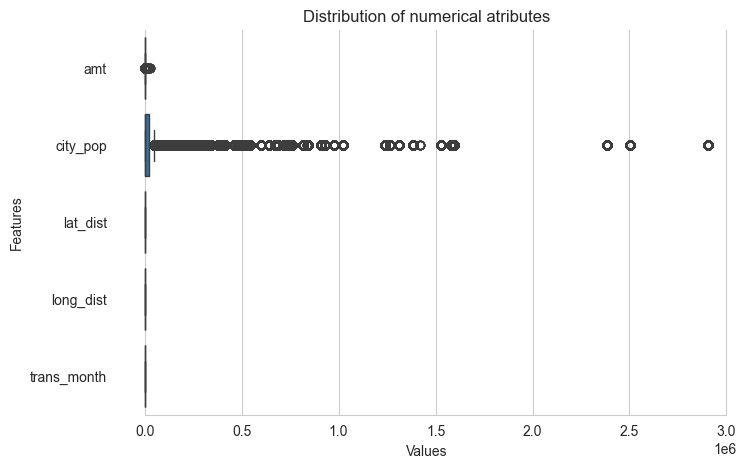

In [72]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df_traindata2.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['is_fraud','age_at_trans']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(8,5))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df_traindata2[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

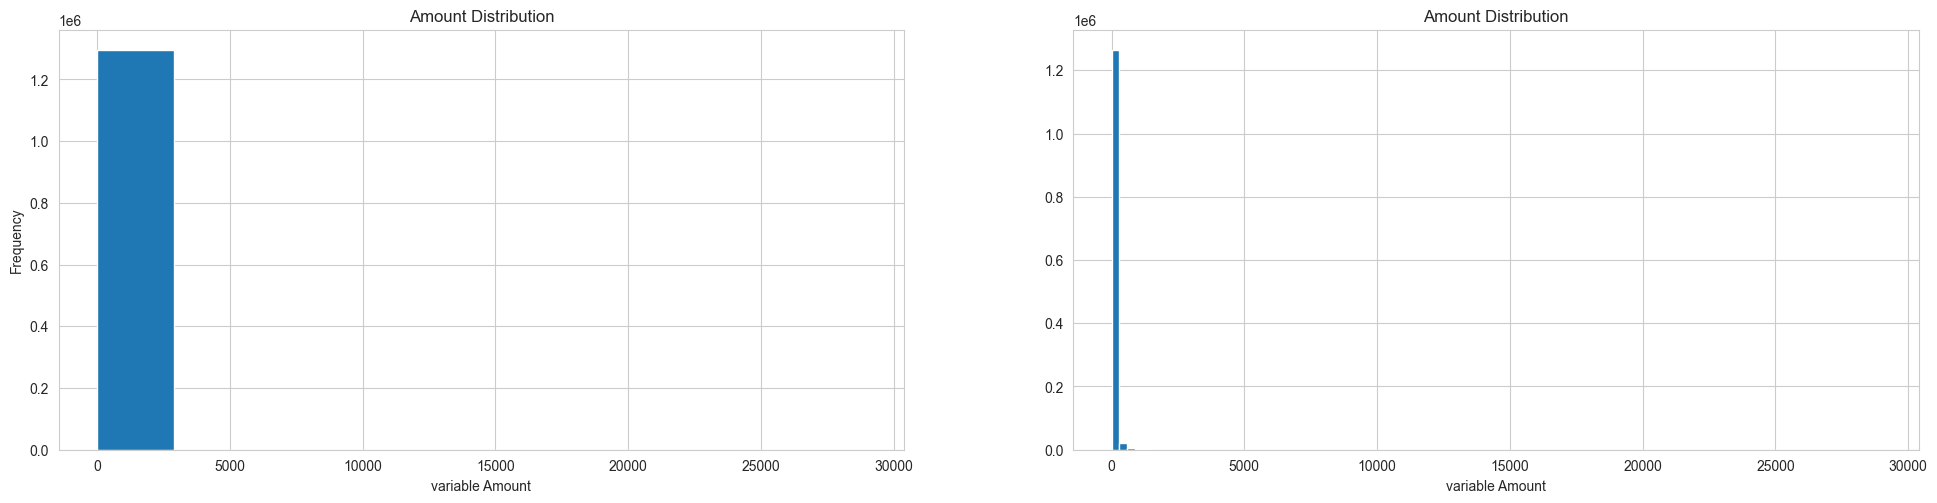

In [73]:
# Understanding the Amount variable as it is not PCA transformed variable :
plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df_traindata2['amt'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df_traindata2['amt'],bins=100)
plt.show()

In [75]:
# Dropping column variable State
df_traindata3 = df_traindata2.drop('state',axis=1)
df_testdata3 = df_testdata2.drop('state',axis=1)

In [76]:
# Show the data after drop
df_traindata3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  object 
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age_at_trans             1296675 non-null  float64
 5   lat_dist                 1296675 non-null  float64
 6   long_dist                1296675 non-null  float64
 7   trans_month              1296675 non-null  int32  
 8   category_food_dining     1296675 non-null  bool   
 9   category_gas_transport   1296675 non-null  bool   
 10  category_grocery_net     1296675 non-null  bool   
 11  category_grocery_pos     1296675 non-null  bool   
 12  category_health_fitness  1296675 non-null  bool   
 13  category_home            1296675 non-null 

In [77]:
#Binary mapping on Gender
df_traindata3['gender'] = df_traindata3['gender'].map({'M': 1, 'F': 0})
df_testdata3['gender'] = df_testdata3['gender'].map({'M': 1, 'F': 0})

df_traindata3.head()

,amt,gender,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.0,0.068,0.870,1,False,False,...,False,False,False,False,True,False,False,False,False,False
1,107.23,0,149,0,40.0,0.271,0.024,1,False,False,...,True,False,False,False,False,False,False,False,False,False
2,220.11,1,4154,0,56.0,0.970,0.108,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45.00,1,1939,0,51.0,0.804,0.447,1,False,True,...,False,False,False,False,False,False,False,False,False,False
4,41.96,1,99,0,32.0,0.254,0.830,1,False,False,...,False,False,False,False,False,True,False,False,False,False


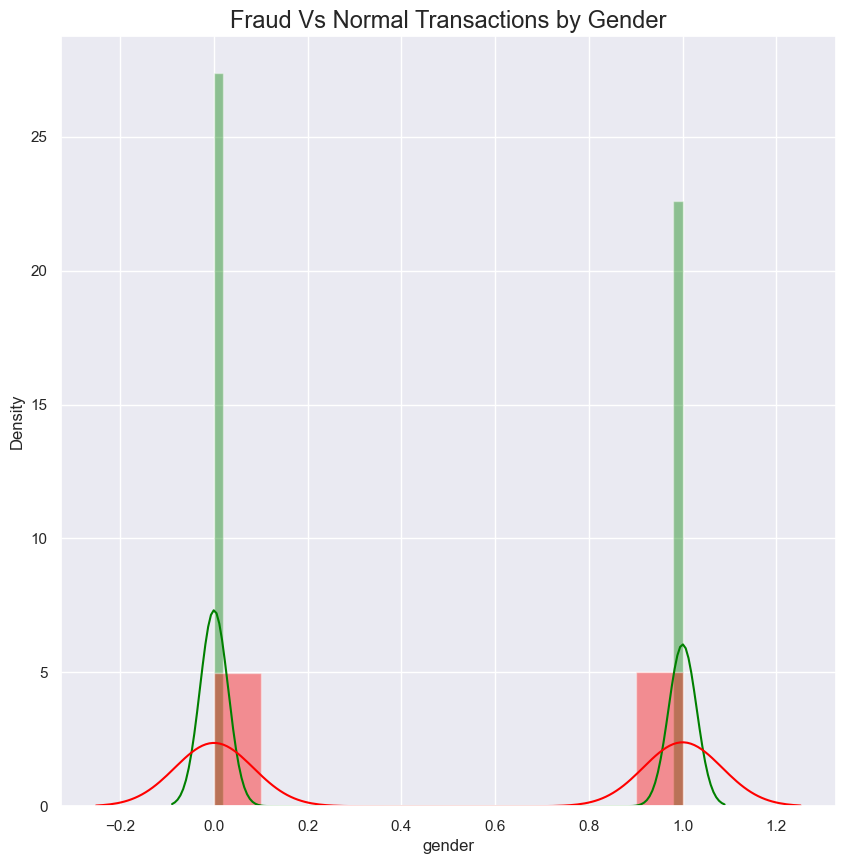

In [78]:
# The fraud Vs normal trasaction by day
plt.figure(figsize=(10,10))
sns.distplot(df_traindata3[df_traindata3['is_fraud'] == 0]["gender"], color='green')
sns.distplot(df_traindata3[df_traindata3['is_fraud'] == 1]["gender"], color='red')
plt.title('Fraud Vs Normal Transactions by Gender', fontsize=17)
plt.show()

#### MODEL BUILDING

In [79]:
# Splitting train and test dataset into X and y

X_train = df_traindata3.drop(['is_fraud'],axis=1)
y_train = df_traindata3['is_fraud']

X_test = df_testdata3.drop(['is_fraud'],axis=1)
y_test = df_testdata3['is_fraud']

In [80]:
# Using ADASYN to oversample
from imblearn.over_sampling import ADASYN
X_train_res, y_train_res = ADASYN().fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_res).items()))

[(0, 1289169), (1, 1288749)]
